In [2]:
# Importing packages

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [3]:
# Reading in CSV file containing NBA player statistics from 1950-2017 seasons 

nba_season_stats = pd.read_csv('NBA Player Season Stats.csv', index_col=0)

In [4]:
nba_season_stats.head(5)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1950.0,Curly Armstrong,G-F,31.0,FTW,63.0,NaN,NaN,NaN,0.368,...,0.705,NaN,NaN,NaN,176.0,NaN,NaN,NaN,217.0,458.0
1,1950.0,Cliff Barker,SG,29.0,INO,49.0,NaN,NaN,NaN,0.435,...,0.708,NaN,NaN,NaN,109.0,NaN,NaN,NaN,99.0,279.0
2,1950.0,Leo Barnhorst,SF,25.0,CHS,67.0,NaN,NaN,NaN,0.394,...,0.698,NaN,NaN,NaN,140.0,NaN,NaN,NaN,192.0,438.0
3,1950.0,Ed Bartels,F,24.0,TOT,15.0,NaN,NaN,NaN,0.312,...,0.559,NaN,NaN,NaN,20.0,NaN,NaN,NaN,29.0,63.0
4,1950.0,Ed Bartels,F,24.0,DNN,13.0,NaN,NaN,NaN,0.308,...,0.548,NaN,NaN,NaN,20.0,NaN,NaN,NaN,27.0,59.0


In [5]:
nba_season_stats.tail(5)

,Year,Player,Pos,Age,Tm,G,GS,MP,PER,TS%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
24686,2017.0,Cody Zeller,PF,24.0,CHO,62.0,58.0,1725.0,16.7,0.604,...,0.679,135.0,270.0,405.0,99.0,62.0,58.0,65.0,189.0,639.0
24687,2017.0,Tyler Zeller,C,27.0,BOS,51.0,5.0,525.0,13.0,0.508,...,0.564,43.0,81.0,124.0,42.0,7.0,21.0,20.0,61.0,178.0
24688,2017.0,Stephen Zimmerman,C,20.0,ORL,19.0,0.0,108.0,7.3,0.346,...,0.600,11.0,24.0,35.0,4.0,2.0,5.0,3.0,17.0,23.0
24689,2017.0,Paul Zipser,SF,22.0,CHI,44.0,18.0,843.0,6.9,0.503,...,0.775,15.0,110.0,125.0,36.0,15.0,16.0,40.0,78.0,240.0
24690,2017.0,Ivica Zubac,C,19.0,LAL,38.0,11.0,609.0,17.0,0.547,...,0.653,41.0,118.0,159.0,30.0,14.0,33.0,30.0,66.0,284.0


In [6]:
# Condensing dataset down to NBA seasons from 1985-2017

nba_season_stats = nba_season_stats[nba_season_stats.Year >= 1985]

In [7]:
# Checking which columns are in dataset 

nba_season_stats.columns

Index(['Year', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'PER', 'TS%',
       '3PAr', 'FTr', 'ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%',
       'USG%', 'blanl', 'OWS', 'DWS', 'WS', 'WS/48', 'blank2', 'OBPM', 'DBPM',
       'BPM', 'VORP', 'FG', 'FGA', 'FG%', '3P', '3PA', '3P%', '2P', '2PA',
       '2P%', 'eFG%', 'FT', 'FTA', 'FT%', 'ORB', 'DRB', 'TRB', 'AST', 'STL',
       'BLK', 'TOV', 'PF', 'PTS'],
      dtype='object')

In [8]:
# Converting season total statistics to per game statistics as I want to predict points per game
# This conversion to per game statistics also accounts for players playing different number of games every season 

nba_season_stats['WS_Per_Game'] = nba_season_stats['WS']/nba_season_stats['G']
nba_season_stats['Minutes_Per_Game'] = nba_season_stats['MP']/nba_season_stats['G']
nba_season_stats['FG_Per_Game'] = nba_season_stats['FG']/nba_season_stats['G']
nba_season_stats['FGA_Per_Game'] = nba_season_stats['FGA']/nba_season_stats['G']
nba_season_stats['3P_Per_Game'] = nba_season_stats['3P']/nba_season_stats['G']
nba_season_stats['3PA_Per_Game'] = nba_season_stats['3PA']/nba_season_stats['G']
nba_season_stats['2P_Per_Game'] = nba_season_stats['2P']/nba_season_stats['G']
nba_season_stats['2PA_Per_Game'] = nba_season_stats['2PA']/nba_season_stats['G']
nba_season_stats['FT_Per_Game'] = nba_season_stats['FT']/nba_season_stats['G']
nba_season_stats['FTA_Per_Game'] = nba_season_stats['FTA']/nba_season_stats['G']
nba_season_stats['ORB_Per_Game'] = nba_season_stats['ORB']/nba_season_stats['G']
nba_season_stats['DRB_Per_Game'] = nba_season_stats['DRB']/nba_season_stats['G']
nba_season_stats['TRB_Per_Game'] = nba_season_stats['TRB']/nba_season_stats['G']
nba_season_stats['AST_Per_Game'] = nba_season_stats['AST']/nba_season_stats['G']
nba_season_stats['STL_Per_Game'] = nba_season_stats['STL']/nba_season_stats['G']
nba_season_stats['BLK_Per_Game'] = nba_season_stats['BLK']/nba_season_stats['G']
nba_season_stats['TOV_Per_Game'] = nba_season_stats['TOV']/nba_season_stats['G']
nba_season_stats['PF_Per_Game'] = nba_season_stats['PF']/nba_season_stats['G']
nba_season_stats['PTS_Per_Game'] = nba_season_stats['PTS']/nba_season_stats['G']

In [9]:
# Dropping blank columns & season total columns that were converted to per game statistics 

nba_season_stats = nba_season_stats.drop(['blanl', 'blank2', 'MP', 'FG', 'FGA', '3P', '3PA', '2P', '2PA', 'FT', 'FTA', 'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS'], axis=1)

In [10]:
# Grouping data by player & year

nba_season_stats = nba_season_stats.sort_values(by=['Player', 'Year'])
nba_season_stats.head(5)

,Year,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,...,FTA_Per_Game,ORB_Per_Game,DRB_Per_Game,TRB_Per_Game,AST_Per_Game,STL_Per_Game,BLK_Per_Game,TOV_Per_Game,PF_Per_Game,PTS_Per_Game
8035,1986.0,A.C. Green,PF,22.0,LAL,82.0,1.0,11.8,0.564,0.015,...,2.036585,1.951220,2.695122,4.646341,0.658537,0.597561,0.597561,1.207317,2.792683,6.353659
8420,1987.0,A.C. Green,PF,23.0,LAL,79.0,72.0,15.7,0.599,0.009,...,3.569620,2.658228,5.126582,7.784810,1.063291,0.886076,1.012658,1.291139,2.164557,10.784810
8807,1988.0,A.C. Green,PF,24.0,LAL,82.0,64.0,14.5,0.581,0.003,...,4.621951,2.987805,5.670732,8.658537,1.134146,1.060976,0.548780,1.463415,2.487805,11.426829
9242,1989.0,A.C. Green,PF,25.0,LAL,82.0,82.0,17.8,0.594,0.022,...,4.378049,3.146341,5.865854,9.012195,1.256098,1.146341,0.670732,1.451220,2.097561,13.268293
9688,1990.0,A.C. Green,PF,26.0,LAL,82.0,82.0,14.7,0.548,0.057,...,4.512195,3.195122,5.487805,8.682927,1.097561,0.804878,0.609756,1.414634,2.524390,12.939024


In [11]:
# Structuring data to allow for PTS_Per_Game to be shifted down one year for every player as I want to use current season player statistics to predict next season's points per game 

nba_season_stats_by_player = nba_season_stats.groupby('Player')['PTS_Per_Game'].shift(-1)

In [12]:
nba_season_stats_by_player = pd.DataFrame(nba_season_stats_by_player)
nba_season_stats_by_player.head(5)

,PTS_Per_Game
8035,10.784810
8420,11.426829
8807,13.268293
9242,12.939024
9688,9.146341


In [13]:
nba_season_stats['PTS_Per_Game_Next_Season'] = nba_season_stats_by_player['PTS_Per_Game']

In [14]:
# Including only player seasons in which a player played in at least 40 games & 15 minutes per game
# This is done to prevent the data from being skewed to players who did not play/contribue much at all in a season

nba_season_stats = nba_season_stats[nba_season_stats.G >= 40]

In [15]:
nba_season_stats = nba_season_stats[nba_season_stats.Minutes_Per_Game >= 15]

In [16]:
# Datatypes are correct
# Can see 3P% & PTS_Per_Game (due to shifting by -1) have missing values

nba_season_stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8718 entries, 8035 to 20802
Data columns (total 52 columns):
Year                        8718 non-null float64
Player                      8718 non-null object
Pos                         8718 non-null object
Age                         8718 non-null float64
Tm                          8718 non-null object
G                           8718 non-null float64
GS                          8718 non-null float64
PER                         8718 non-null float64
TS%                         8718 non-null float64
3PAr                        8718 non-null float64
FTr                         8718 non-null float64
ORB%                        8718 non-null float64
DRB%                        8718 non-null float64
TRB%                        8718 non-null float64
AST%                        8718 non-null float64
STL%                        8718 non-null float64
BLK%                        8718 non-null float64
TOV%                        8718 non-null 

In [17]:
# Missing values in 3P% column are due to 0 3P_Per_Game being divided by 0 3PA_Per_Game

nba_season_stats[nba_season_stats['3P%'].isnull()].head(5)

,Year,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,...,ORB_Per_Game,DRB_Per_Game,TRB_Per_Game,AST_Per_Game,STL_Per_Game,BLK_Per_Game,TOV_Per_Game,PF_Per_Game,PTS_Per_Game,PTS_Per_Game_Next_Season
21327,2012.0,Aaron Gray,C,27.0,TOR,49.0,40.0,11.1,0.526,0.0,...,1.693878,4.040816,5.734694,0.551020,0.448980,0.346939,1.040816,2.591837,3.897959,2.833333
18204,2006.0,Aaron Williams,C,34.0,TOT,48.0,5.0,11.6,0.551,0.0,...,1.333333,2.437500,3.770833,0.354167,0.354167,0.437500,0.625000,2.875000,4.625000,1.785714
12049,1995.0,Adam Keefe,SF,24.0,UTA,75.0,0.0,15.1,0.616,0.0,...,1.800000,2.560000,4.360000,0.400000,0.480000,0.333333,0.826667,1.880000,6.146667,6.085366
13656,1998.0,Adam Keefe,C,27.0,UTA,80.0,75.0,14.5,0.605,0.0,...,2.237500,3.237500,5.475000,1.112500,0.650000,0.300000,0.887500,2.150000,7.750000,3.954545
14628,2000.0,Adonal Foyle,C,24.0,GSW,76.0,59.0,12.3,0.500,0.0,...,2.289474,3.289474,5.578947,0.552632,0.342105,1.789474,0.934211,2.868421,5.526316,5.896552


In [18]:
# Filling in missing values in 3P% column with 0

nba_season_stats['3P%'] = nba_season_stats['3P%'].fillna(0)

In [19]:
# Dropping rows with missing values in PTS_Per_Game_Next_Season column 

nba_season_stats = nba_season_stats.dropna()

In [20]:
nba_season_stats = nba_season_stats.sort_values(by='Year')
nba_season_stats.head(5)

,Year,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,...,ORB_Per_Game,DRB_Per_Game,TRB_Per_Game,AST_Per_Game,STL_Per_Game,BLK_Per_Game,TOV_Per_Game,PF_Per_Game,PTS_Per_Game,PTS_Per_Game_Next_Season
7901,1985.0,Gus Williams,PG,31.0,WSB,79.0,78.0,17.3,0.482,0.119,...,0.911392,1.556962,2.468354,7.696203,2.253165,0.405063,2.696203,2.012658,19.974684,13.454545
7908,1985.0,Kevin Willis,PF,22.0,ATL,82.0,19.0,12.9,0.497,0.013,...,2.158537,4.207317,6.365854,0.439024,0.378049,0.597561,1.268293,2.756098,9.329268,12.317073
7634,1985.0,Clyde Drexler*,SG,22.0,POR,80.0,43.0,19.7,0.534,0.032,...,2.712500,3.237500,5.950000,5.512500,2.212500,0.850000,2.787500,3.312500,17.212500,18.520000
7803,1985.0,Clint Richardson,SG,28.0,PHI,74.0,20.0,9.1,0.500,0.007,...,0.810811,1.283784,2.094595,2.121622,0.500000,0.202703,1.054054,1.932432,5.986486,9.682927
7736,1985.0,Alton Lister,C,26.0,MIL,81.0,80.0,15.0,0.559,0.002,...,2.703704,5.283951,7.987654,1.567901,0.604938,2.061728,2.259259,3.543210,9.851852,9.827160


In [21]:
# Seeing how many player records there are per year in dataset 

nba_season_stats.groupby('Year').count()

,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,FTr,...,ORB_Per_Game,DRB_Per_Game,TRB_Per_Game,AST_Per_Game,STL_Per_Game,BLK_Per_Game,TOV_Per_Game,PF_Per_Game,PTS_Per_Game,PTS_Per_Game_Next_Season
Year,,,,,,,,,,,,,,,,,,,,,
1985.0,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
1986.0,198,198,198,198,198,198,198,198,198,198,...,198,198,198,198,198,198,198,198,198,198
1987.0,199,199,199,199,199,199,199,199,199,199,...,199,199,199,199,199,199,199,199,199,199
1988.0,214,214,214,214,214,214,214,214,214,214,...,214,214,214,214,214,214,214,214,214,214
1989.0,218,218,218,218,218,218,218,218,218,218,...,218,218,218,218,218,218,218,218,218,218
1990.0,228,228,228,228,228,228,228,228,228,228,...,228,228,228,228,228,228,228,228,228,228
1991.0,227,227,227,227,227,227,227,227,227,227,...,227,227,227,227,227,227,227,227,227,227
1992.0,235,235,235,235,235,235,235,235,235,235,...,235,235,235,235,235,235,235,235,235,235
1993.0,234,234,234,234,234,234,234,234,234,234,...,234,234,234,234,234,234,234,234,234,234


In [22]:
# Removing 2017 records from dataset (still has records due to players playing for multiple teams during year)
# All other records from 2017 were previously dropped as they could not have a Points_Per_Game_Next_Season column

nba_season_stats = nba_season_stats[nba_season_stats.Year < 2017]

In [23]:
# Bringing in data from 2017-2020 seasons, will be used as testing data 
# Data was put together from statistics kept by https://www.basketball-reference.com/
# 2017-2020 data combined in Excel & manipulated into needed format for analysis

nba_season_stats_2017_2020 = pd.read_excel('NBA Season Stats 2017-2020.xlsx', sheet_name=0)

In [24]:
nba_season_stats_2017_2020.head(5)

,Player,Year,Pos,Age,Tm,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,Álex Abrines,2017,SG,23,OKC,68,6,15.5,2.0,5.0,...,8.3,15.9,1.2,0.9,2.1,0.096,-1.3,-0.4,-1.6,0.1
1,Quincy Acy,2017,PF,26,TOT,38,1,14.7,1.8,4.5,...,9.7,16.8,0.5,0.5,0.9,0.082,-1.5,-0.6,-2.1,0.0
2,Quincy Acy,2017,PF,26,DAL,6,0,8.0,0.8,2.8,...,9.8,20.0,-0.2,0.0,-0.1,-0.133,-10.3,-4.1,-14.3,-0.1
3,Quincy Acy,2017,PF,26,BRK,32,1,15.9,2.0,4.8,...,9.6,16.5,0.6,0.5,1.1,0.102,-0.6,-0.2,-0.9,0.1
4,Steven Adams,2017,C,23,OKC,80,80,29.9,4.7,8.2,...,16.0,16.2,3.3,3.1,6.5,0.130,-0.2,0.0,-0.2,1.1


In [25]:
nba_season_stats_2017_2020.tail(5)

,Player,Year,Pos,Age,Tm,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
2613,Trae Young,2020,PG,21,ATL,60,60,35.3,9.1,20.8,...,16.2,34.9,5.3,0.6,5.9,0.133,6.2,-2.3,3.9,3.1
2614,Cody Zeller,2020,C,27,CHO,58,39,23.1,4.3,8.3,...,11.9,20.8,2.3,1.3,3.6,0.129,0.2,-0.8,-0.6,0.5
2615,Tyler Zeller,2020,C,30,SAS,2,0,2.0,0.5,2.0,...,0.0,43.2,0.0,0.0,0.0,-0.075,-0.3,-22.1,-22.4,0.0
2616,Ante Žižić,2020,C,23,CLE,22,0,10.0,1.9,3.3,...,11.1,17.5,0.3,0.2,0.5,0.106,-1.7,-1.5,-3.2,-0.1
2617,Ivica Zubac,2020,C,22,LAC,72,70,18.4,3.3,5.3,...,11.8,16.4,4.4,2.3,6.6,0.241,1.9,0.8,2.8,1.6


In [26]:
# Creating WS_Per_Game variable for testing data 

nba_season_stats_2017_2020['WS_Per_Game'] = nba_season_stats_2017_2020['WS']/nba_season_stats_2017_2020['G']

In [27]:
# Steps to create Points_Per_Game_Next_Season variable within testing data

nba_season_stats_2017_2020 = nba_season_stats_2017_2020.sort_values(by=['Player', 'Year'])
nba_season_stats_2017_2020.head(5)

,Player,Year,Pos,Age,Tm,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,...,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,WS_Per_Game
208,A.J. Hammons,2017,C,24,DAL,22,0,7.4,0.8,1.9,...,17.6,-0.2,0.2,0.0,-0.001,-6.6,0.0,-6.6,-0.2,0.000000
69,Aaron Brooks,2017,PG,32,IND,65,0,13.8,1.9,4.6,...,19.2,-0.2,0.5,0.3,0.016,-2.4,-1.2,-3.7,-0.4,0.004615
674,Aaron Brooks,2018,PG,33,MIN,32,1,5.9,0.9,2.2,...,19.9,0.1,0.1,0.1,0.033,-2.6,-1.3,-3.8,-0.1,0.003125
193,Aaron Gordon,2017,SF,21,ORL,80,72,28.7,4.9,10.8,...,20.1,2.0,1.7,3.7,0.077,-0.3,-0.7,-1.0,0.6,0.046250
810,Aaron Gordon,2018,PF,22,ORL,58,57,32.9,6.5,14.9,...,24.7,0.9,2.0,2.9,0.072,0.9,-0.6,0.3,1.1,0.050000


In [28]:
nba_season_stats_by_player_2017_2020 = nba_season_stats_2017_2020.groupby('Player')['PTS_Per_Game'].shift(-1)

In [29]:
nba_season_stats_by_player_2017_2020 = pd.DataFrame(nba_season_stats_by_player_2017_2020)
nba_season_stats_by_player_2017_2020.head(5)

,PTS_Per_Game
208,NaN
69,2.3
674,NaN
193,17.6
810,16.0


In [30]:
nba_season_stats_2017_2020['PTS_Per_Game_Next_Season'] = nba_season_stats_by_player_2017_2020['PTS_Per_Game']

In [31]:
# Removing rows within testing data where a player did not play in at least 40 games during a season or 15 minutes per game

nba_season_stats_2017_2020 = nba_season_stats_2017_2020[nba_season_stats_2017_2020.G >= 40]
nba_season_stats_2017_2020 = nba_season_stats_2017_2020[nba_season_stats_2017_2020.Minutes_Per_Game >= 15]

In [32]:
nba_season_stats_2017_2020.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1248 entries, 193 to 595
Data columns (total 52 columns):
Player                      1248 non-null object
Year                        1248 non-null int64
Pos                         1248 non-null object
Age                         1248 non-null int64
Tm                          1248 non-null object
G                           1248 non-null int64
GS                          1248 non-null int64
Minutes_Per_Game            1248 non-null float64
FG_Per_Game                 1248 non-null float64
FGA_Per_Game                1248 non-null float64
FG%                         1248 non-null float64
3P_Per_Game                 1248 non-null float64
3PA_Per_Game                1248 non-null float64
3P%                         1209 non-null float64
2P_Per_Game                 1248 non-null float64
2PA_Per_Game                1248 non-null float64
2P%                         1248 non-null float64
eFG%                        1248 non-null float64
FT_

In [33]:
# Filling in missing values in 3P% column with 0 in testing data

nba_season_stats_2017_2020['3P%'] = nba_season_stats_2017_2020['3P%'].fillna(0)

In [34]:
# Dropping rows with missing values in PTS_Per_Game_Next_Season column in testing data

nba_season_stats_2017_2020 = nba_season_stats_2017_2020.dropna()

In [35]:
nba_season_stats_2017_2020 = nba_season_stats_2017_2020.sort_values(by='Year')
nba_season_stats_2017_2020.head(5)

,Player,Year,Pos,Age,Tm,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,WS_Per_Game,PTS_Per_Game_Next_Season
193,Aaron Gordon,2017,SF,21,ORL,80,72,28.7,4.9,10.8,...,2.0,1.7,3.7,0.077,-0.3,-0.7,-1.0,0.6,0.046250,17.6
143,Kevin Durant,2017,PF,28,GSW,62,62,33.4,8.9,16.5,...,8.0,4.0,12.0,0.278,6.7,2.2,8.9,5.7,0.193548,26.4
84,Kentavious Caldwell-Pope,2017,SG,23,DET,76,75,33.3,4.9,12.2,...,2.0,2.5,4.5,0.086,-0.6,0.4,-0.2,1.1,0.059211,13.4
40,Kent Bazemore,2017,SF,27,ATL,73,64,26.9,4.0,9.9,...,-0.6,2.8,2.1,0.052,-2.1,1.1,-1.0,0.5,0.028767,12.9
157,Kenneth Faried,2017,PF,27,DEN,61,34,21.2,3.7,6.8,...,3.3,1.2,4.5,0.168,1.5,-1.2,0.3,0.7,0.073770,5.9


In [36]:
# Have to remove remaining 2020 rows from testing data as rows still only remain cause of players playing for multiple teams that year

nba_season_stats_2017_2020 = nba_season_stats_2017_2020[nba_season_stats_2017_2020.Year < 2020]

In [37]:
nba_season_stats_2017_2020.groupby('Year').count()

,Player,Pos,Age,Tm,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,FG%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,WS_Per_Game,PTS_Per_Game_Next_Season
Year,,,,,,,,,,,,,,,,,,,,,
2017,304,304,304,304,304,304,304,304,304,304,...,304,304,304,304,304,304,304,304,304,304
2018,295,295,295,295,295,295,295,295,295,295,...,295,295,295,295,295,295,295,295,295,295
2019,319,319,319,319,319,319,319,319,319,319,...,319,319,319,319,319,319,319,319,319,319


In [38]:
# The mean PTS_Per_Game & PTS_Per Game_Next_Season have not varied much between 1985 & 2016
# This shows that statistics based on year/consecutive years do not affect Points Per Game 

nba_season_stats.groupby('Year')['PTS_Per_Game'].mean()

Year
1985.0    12.708718
1986.0    12.442260
1987.0    12.643086
1988.0    12.375713
1989.0    12.765684
1990.0    12.720989
1991.0    12.657469
1992.0    12.099520
1993.0    12.131006
1994.0    11.765526
1995.0    11.949534
1996.0    11.753662
1997.0    11.485688
1998.0    11.117602
1999.0    11.118575
2000.0    11.213233
2001.0    10.957814
2002.0    11.240364
2003.0    11.138898
2004.0    11.110462
2005.0    11.307281
2006.0    11.522222
2007.0    11.631636
2008.0    11.579254
2009.0    11.874332
2010.0    11.560792
2011.0    11.215163
2012.0    10.871376
2013.0    10.900585
2014.0    11.256599
2015.0    10.650751
2016.0    11.178227
Name: PTS_Per_Game, dtype: float64

In [39]:
nba_season_stats.groupby('Year')['PTS_Per_Game_Next_Season'].mean()

Year
1985.0    12.040190
1986.0    11.758484
1987.0    11.782795
1988.0    11.828764
1989.0    12.216756
1990.0    11.855935
1991.0    11.852999
1992.0    11.041622
1993.0    10.999702
1994.0    11.316600
1995.0    11.391356
1996.0    10.650975
1997.0    10.376356
1998.0     9.832369
1999.0    10.949927
2000.0    10.752416
2001.0    10.383140
2002.0    10.453278
2003.0    10.630107
2004.0    10.933628
2005.0    10.684869
2006.0    11.053772
2007.0    10.874199
2008.0    10.991819
2009.0    10.894454
2010.0    10.875215
2011.0    10.351128
2012.0    10.470009
2013.0    10.614663
2014.0    10.468772
2015.0    10.166959
2016.0    11.077077
Name: PTS_Per_Game_Next_Season, dtype: float64

In [40]:
# This lack of variance can be seen in the testing data as well

nba_season_stats_2017_2020.groupby('Year')['PTS_Per_Game'].mean()

Year
2017    11.435197
2018    11.670847
2019    11.812226
Name: PTS_Per_Game, dtype: float64

In [41]:
nba_season_stats_2017_2020.groupby('Year')['PTS_Per_Game_Next_Season'].mean()

Year
2017    10.996053
2018    11.270847
2019    11.602194
Name: PTS_Per_Game_Next_Season, dtype: float64

In [42]:
# Summary statistics of numeric attributes in training & testing data

nba_season_stats.describe()

,Year,Age,G,GS,PER,TS%,3PAr,FTr,ORB%,DRB%,...,ORB_Per_Game,DRB_Per_Game,TRB_Per_Game,AST_Per_Game,STL_Per_Game,BLK_Per_Game,TOV_Per_Game,PF_Per_Game,PTS_Per_Game,PTS_Per_Game_Next_Season
count,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,...,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000,8163.000000
mean,2001.548695,27.016661,69.713586,42.818082,14.847654,0.532713,0.172731,0.310653,5.807987,14.101654,...,1.367749,3.384646,4.752395,2.613452,0.902686,0.562416,1.664440,2.385609,11.596741,10.929341
std,9.127103,3.877943,12.052214,28.649614,3.862055,0.043168,0.178610,0.131589,3.704611,5.776903,...,0.932534,1.758442,2.549260,2.043081,0.456851,0.598532,0.749681,0.657713,5.514908,6.038397
min,1985.000000,18.000000,40.000000,0.000000,2.000000,0.344000,0.000000,0.043000,0.200000,3.200000,...,0.058824,0.561404,0.649123,0.125000,0.115942,0.000000,0.148148,0.581818,1.146667,0.000000
25%,1994.000000,24.000000,62.000000,15.000000,12.200000,0.505000,0.009000,0.217000,2.600000,9.300000,...,0.600000,2.097800,2.829888,1.145044,0.573252,0.173333,1.090909,1.907794,7.293333,6.250000
50%,2002.000000,27.000000,74.000000,45.000000,14.500000,0.532000,0.109000,0.292000,4.900000,13.000000,...,1.157895,2.976744,4.170732,2.000000,0.812500,0.353659,1.518987,2.362319,10.447368,10.044118
75%,2010.000000,30.000000,80.000000,72.000000,16.900000,0.560000,0.307000,0.383000,8.600000,18.400000,...,1.950718,4.251667,6.165666,3.445906,1.134146,0.731707,2.134146,2.843953,14.940666,14.768717
max,2016.000000,41.000000,85.000000,83.000000,31.700000,0.708000,0.873000,1.219000,20.800000,38.000000,...,6.815385,12.338710,18.658537,14.538462,3.670732,5.560976,4.735294,4.590164,37.085366,35.400000


In [43]:
nba_season_stats_2017_2020.describe()

,Year,Age,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,FG%,3P_Per_Game,3PA_Per_Game,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,WS_Per_Game,PTS_Per_Game_Next_Season
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,...,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,2018.016340,26.419390,67.602397,39.019608,25.592048,4.298911,9.351961,0.460209,1.151743,3.190959,...,2.048584,1.765468,3.814161,0.098956,-0.101307,-0.012309,-0.114706,1.017102,0.054861,11.294989
std,0.824089,4.090782,11.961036,28.024947,5.953410,1.983102,4.152488,0.061218,0.820161,2.114136,...,2.155127,1.021137,2.829783,0.054477,2.348562,1.089651,2.683483,1.542110,0.037574,6.097905
min,2017.000000,19.000000,40.000000,0.000000,15.000000,0.900000,1.800000,0.325000,0.000000,0.000000,...,-2.800000,-0.500000,-1.700000,-0.045000,-5.400000,-3.300000,-6.000000,-2.000000,-0.021519,0.000000
25%,2017.000000,23.000000,59.000000,12.250000,20.425000,2.800000,6.100000,0.418000,0.600000,1.700000,...,0.600000,1.000000,1.900000,0.062000,-1.600000,-0.800000,-1.900000,0.000000,0.030548,6.700000
50%,2018.000000,26.000000,71.000000,37.000000,25.750000,3.900000,8.450000,0.448000,1.100000,3.000000,...,1.600000,1.500000,3.150000,0.093500,-0.400000,-0.100000,-0.500000,0.600000,0.046855,10.300000
75%,2019.000000,29.000000,78.000000,67.000000,30.675000,5.500000,11.675000,0.487000,1.700000,4.600000,...,2.900000,2.375000,5.100000,0.126000,1.000000,0.700000,1.100000,1.500000,0.070534,14.700000
max,2019.000000,42.000000,82.000000,82.000000,37.800000,10.800000,24.500000,0.714000,5.100000,13.200000,...,11.600000,6.000000,15.400000,0.292000,9.400000,4.100000,11.100000,9.300000,0.213889,36.100000


In [44]:
# Seeing statistics for a specific player 

nba_season_stats[nba_season_stats['Player'] == 'LeBron James'].head(10)

,Year,Player,Pos,Age,Tm,G,GS,PER,TS%,3PAr,...,ORB_Per_Game,DRB_Per_Game,TRB_Per_Game,AST_Per_Game,STL_Per_Game,BLK_Per_Game,TOV_Per_Game,PF_Per_Game,PTS_Per_Game,PTS_Per_Game_Next_Season
16746,2004.0,LeBron James,SG,19.0,CLE,79.0,79.0,18.3,0.488,0.145,...,1.253165,4.215190,5.468354,5.886076,1.645570,0.734177,3.455696,1.886076,20.936709,27.187500
17344,2005.0,LeBron James,SF,20.0,CLE,80.0,80.0,25.7,0.554,0.183,...,1.387500,5.962500,7.350000,7.212500,2.212500,0.650000,3.275000,1.825000,27.187500,31.367089
17918,2006.0,LeBron James,SF,21.0,CLE,79.0,79.0,28.1,0.568,0.208,...,0.949367,6.088608,7.037975,6.594937,1.556962,0.835443,3.291139,2.291139,31.367089,27.333333
18460,2007.0,LeBron James,SF,22.0,CLE,78.0,78.0,24.5,0.552,0.191,...,1.064103,5.679487,6.743590,6.025641,1.602564,0.705128,3.205128,2.192308,27.333333,30.000000
19017,2008.0,LeBron James,SF,23.0,CLE,75.0,74.0,29.1,0.568,0.219,...,1.773333,6.120000,7.893333,7.186667,1.840000,1.080000,3.400000,2.200000,30.000000,28.444444
19611,2009.0,LeBron James,SF,24.0,CLE,81.0,81.0,31.7,0.591,0.238,...,1.308642,6.259259,7.567901,7.246914,1.691358,1.148148,2.975309,1.716049,28.444444,29.710526
20207,2010.0,LeBron James,SF,25.0,CLE,76.0,76.0,31.1,0.604,0.253,...,0.934211,6.355263,7.289474,8.565789,1.644737,1.013158,3.434211,1.565789,29.710526,26.721519
20812,2011.0,LeBron James,SF,26.0,MIA,79.0,79.0,27.3,0.594,0.188,...,1.012658,6.455696,7.468354,7.012658,1.569620,0.632911,3.594937,2.063291,26.721519,27.145161
21395,2012.0,LeBron James,SF,27.0,MIA,62.0,62.0,30.7,0.605,0.127,...,1.516129,6.419355,7.935484,6.241935,1.854839,0.806452,3.435484,1.548387,27.145161,26.789474
21933,2013.0,LeBron James,PF,28.0,MIA,76.0,76.0,31.6,0.640,0.188,...,1.276316,6.750000,8.026316,7.250000,1.697368,0.881579,2.973684,1.447368,26.789474,27.129870


In [45]:
# This dataset containing statisitics from latest NBA season will be used later as a testing set by itself 

nba_season_stats_2019_2020 = nba_season_stats_2017_2020[nba_season_stats_2017_2020.Year == 2019]

In [46]:
# Dropping non-statistical columns
# Dropping columns that are derived from combinations of other columns
# Dropping 'advanced' statistical columns that do not increase predictability power of models (models tested with columns), information from these columns also represented by simpler/common statistics

nba_season_stats = nba_season_stats.drop(['Player', 'Pos', 'Tm', 'OWS', 'DWS', 'WS', 'WS/48', 'BPM', 'TRB_Per_Game', 'FG%', '3P%', '2P%', 'FT%','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'TS%', '3PAr', 'FTr', 'eFG%', 'WS_Per_Game', 'PER', 'VORP'], axis=1)
nba_season_stats_2017_2020 = nba_season_stats_2017_2020.drop(['Player', 'Pos', 'Tm', 'OWS', 'DWS', 'WS', 'WS/48', 'BPM', 'TRB_Per_Game', 'FG%', '3P%', '2P%', 'FT%','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'TS%', '3PAr', 'FTr', 'eFG%', 'WS_Per_Game', 'PER', 'VORP'], axis=1)

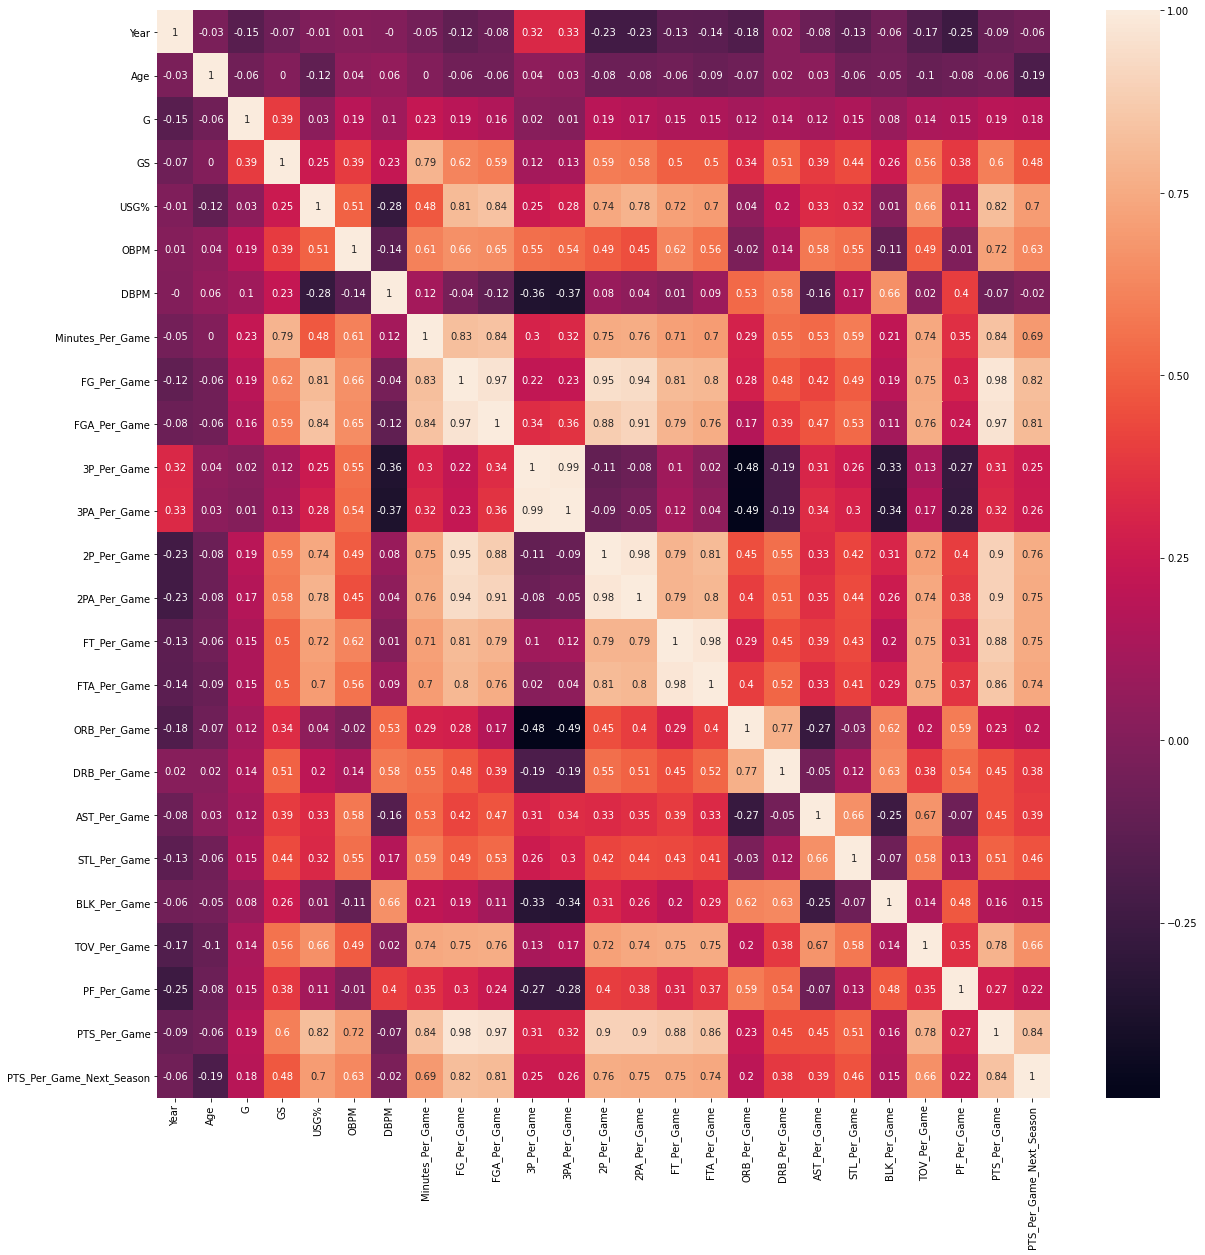

In [47]:
# Correlation matrix for training data showing correlation coefficients between all predictor variables & between predictor variables & Points_Per_Game_Next_Season

plt.figure(figsize = (20,20))
correlation_matrix = nba_season_stats.corr().round(2)
sns.heatmap(data=correlation_matrix, annot=True)

In [48]:
# Viewing distributions of numerical variables from training data being included in models & how/if they are correlated with Points_Per_Game_Next_Season

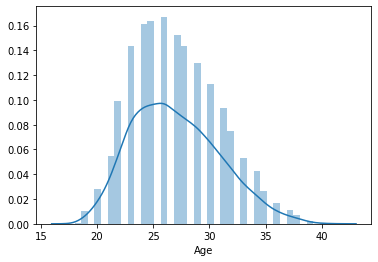

In [49]:
# Distribution of Age is slightly right skewed, Age close to 26 the most common 

sns.distplot(nba_season_stats['Age'])

Text(0.5, 1.0, 'Age vs Points Per Game Next Season')

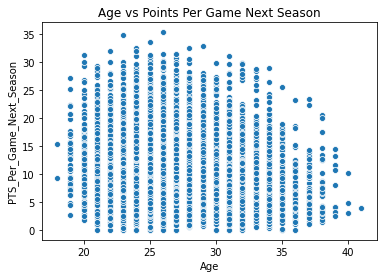

In [50]:
# No significant correlation seen between Age & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['Age'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Age vs Points Per Game Next Season')

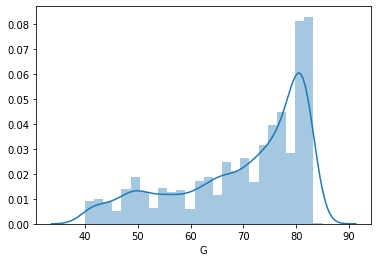

In [51]:
# Distribution of Games Played is heavily left skewed, around 80 Games Played is the most common

sns.distplot(nba_season_stats['G'])

Text(0.5, 1.0, 'Games Played vs Points Per Game Next Season')

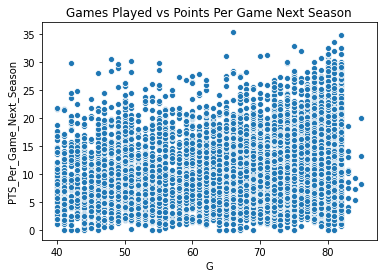

In [52]:
# No significant correlation seen between Games Played & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['G'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Games Played vs Points Per Game Next Season')

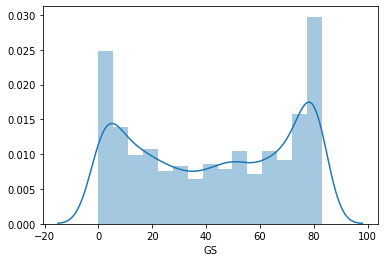

In [53]:
# Distribution of Games Started is bi-modal with either 0 or about 80 Games Started being the most common 

sns.distplot(nba_season_stats['GS'])

Text(0.5, 1.0, 'Games Started vs Points Per Game Next Season')

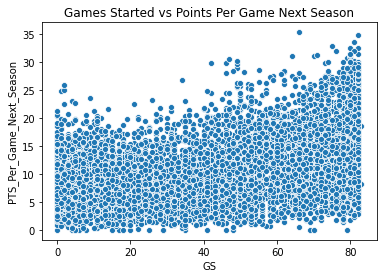

In [54]:
# Slight positve correlation seen between Games Started & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['GS'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Games Started vs Points Per Game Next Season')

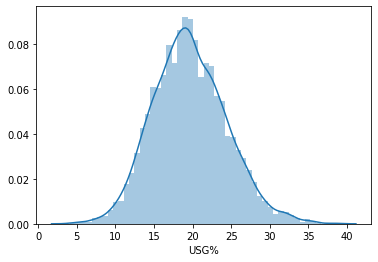

In [55]:
# USG% has a normal distribution with about a USG% of 20% being the most common 

sns.distplot(nba_season_stats['USG%'])

Text(0.5, 1.0, 'Usage % vs Points Per Game Next Season')

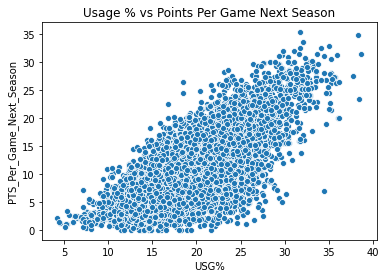

In [56]:
# Positive correlation seen between USG% & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['USG%'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Usage % vs Points Per Game Next Season')

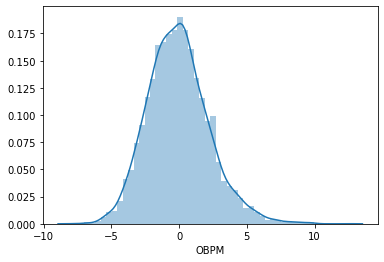

In [57]:
# OBPM has a normal distribution with an OBPM of 0 being the most common 

sns.distplot(nba_season_stats['OBPM'])

Text(0.5, 1.0, 'Offensive Box Plus/Minus vs Points Per Game Next Season')

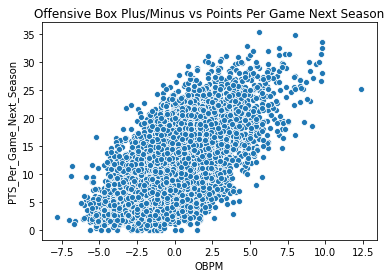

In [58]:
# Offensive Box Plus/Minues has a positive correlation with Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['OBPM'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Offensive Box Plus/Minus vs Points Per Game Next Season')

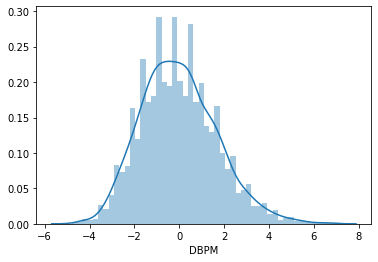

In [59]:
# DBPM has close to a normal distribution with a DBPM of 0 being the the most common 

sns.distplot(nba_season_stats['DBPM'])

Text(0.5, 1.0, 'Defensive Box Plus/Minus vs Points Per Game Next Season')

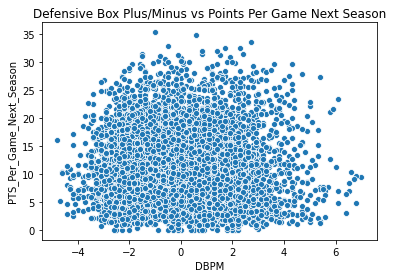

In [60]:
# No correlation seen between Defensive Box Plus/Minus & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['DBPM'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Defensive Box Plus/Minus vs Points Per Game Next Season')

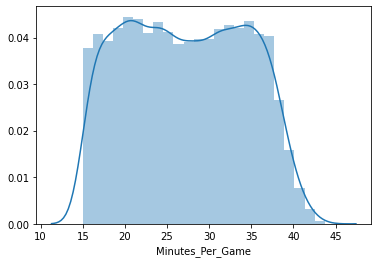

In [61]:
# Minutes Per Game has a uniform distribution 

sns.distplot(nba_season_stats['Minutes_Per_Game'])

Text(0.5, 1.0, 'Minutes Per Game vs Points Per Game Next Season')

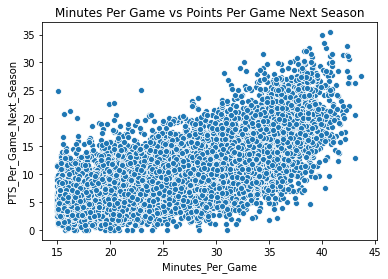

In [62]:
# Minutes Per Game has a positive correlation with Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['Minutes_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Minutes Per Game vs Points Per Game Next Season')

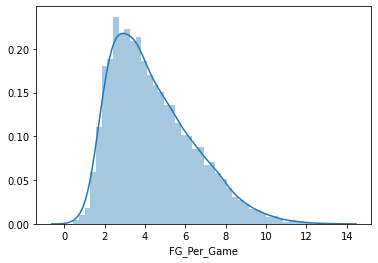

In [63]:
# Field Goals Per Game has a right skewed distribution with about 3 Field Goals Per Game being the most common 

sns.distplot(nba_season_stats['FG_Per_Game'])

Text(0.5, 1.0, 'Field Goals Per Game vs Points Per Game Next Season')

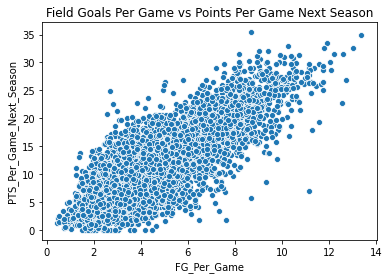

In [64]:
# Field Goals Per Game has a strong positive correlation with Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['FG_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Field Goals Per Game vs Points Per Game Next Season')

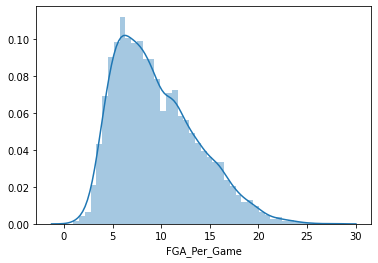

In [65]:
# Field Goals Attempted Per Game also has a right skewed distribution with about 6 Field Goals Attempted Per Game being the most common 

sns.distplot(nba_season_stats['FGA_Per_Game'])

Text(0.5, 1.0, 'Field Goals Attempted Per Game vs Points Per Game Next Season')

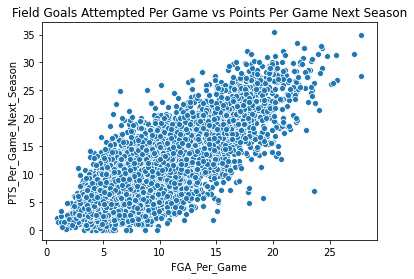

In [66]:
# Field Goals Attempted Per Game also has a strong positive correlation with Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['FGA_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Field Goals Attempted Per Game vs Points Per Game Next Season')

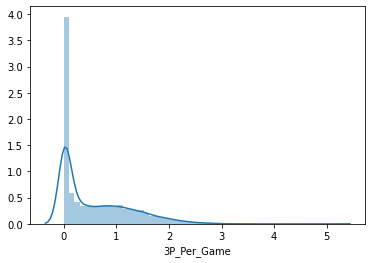

In [67]:
# 3 Pointers Per Game has a heaviliy right skewed distribution, 0 3 Pointers Per Game is the most common 

sns.distplot(nba_season_stats['3P_Per_Game'])

Text(0.5, 1.0, '3 Pointers Per Game vs Points Per Game Next Season')

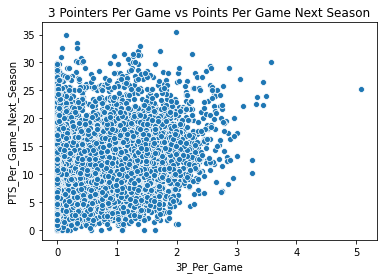

In [68]:
# No significant correlation seen between 3 Pointers Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['3P_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('3 Pointers Per Game vs Points Per Game Next Season')

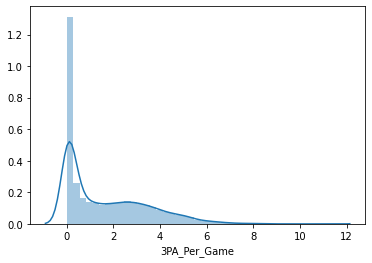

In [69]:
# 3 Pointers Attempted Per Game also has a heaviliy right skewed distribution, 0 3 Pointers Attempted Per Game is the most common 

sns.distplot(nba_season_stats['3PA_Per_Game'])

Text(0.5, 1.0, '3 Pointers Attempted Per Game vs Points Per Game Next Season')

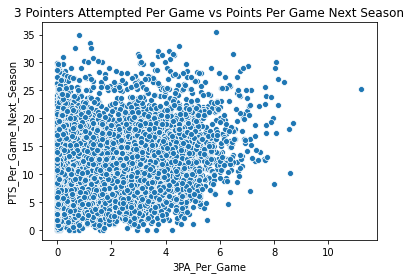

In [70]:
# No significant correlation seen between 3 Pointers Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['3PA_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('3 Pointers Attempted Per Game vs Points Per Game Next Season')

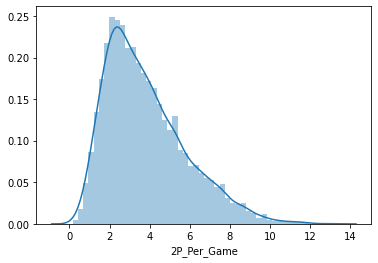

In [71]:
# 2 Pointers Per Game has a right skewed distribution, around 2-3 2 Pointers Per Game the most common

sns.distplot(nba_season_stats['2P_Per_Game'])

Text(0.5, 1.0, '2 Pointers Per Game vs Points Per Game Next Season')

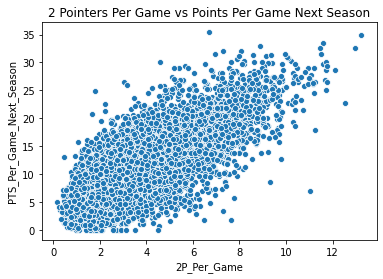

In [72]:
# Strong positive correlation seen between 2 Pointers Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['2P_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('2 Pointers Per Game vs Points Per Game Next Season')

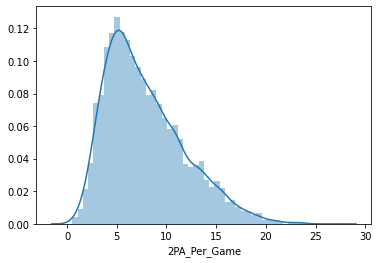

In [73]:
# 2 Pointers Attempted Per Game has a right skewed distribution, around 6 2 Pointers Attempted Per Game is the most common

sns.distplot(nba_season_stats['2PA_Per_Game'])

Text(0.5, 1.0, '2 Pointers Attempted Per Game vs Points Per Game Next Season')

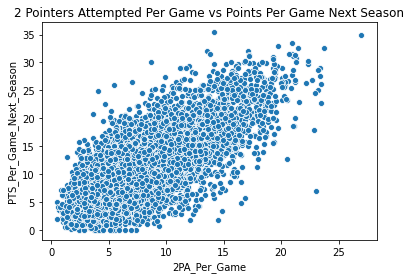

In [74]:
# Strong positive correlation seen between 2 Pointers Attempted Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['2PA_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('2 Pointers Attempted Per Game vs Points Per Game Next Season')

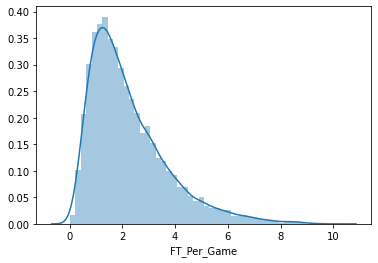

In [75]:
# Free Throws Per Game has a right skewed distribution with close to 2 Free Throws Per Game being the most common 

sns.distplot(nba_season_stats['FT_Per_Game'])

Text(0.5, 1.0, 'Free Throws Per Game vs Points Per Game Next Season')

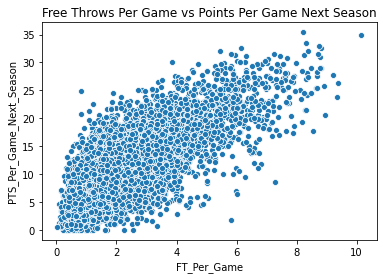

In [76]:
# Positive correlation seen between Free Throws Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['FT_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Free Throws Per Game vs Points Per Game Next Season')

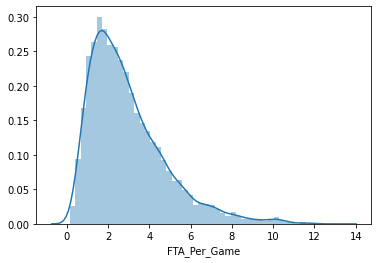

In [77]:
# Free Throws Attempted Per Game has a right skewed distribution with close to 2 Free Throws Attempted Per Game being the most common 

sns.distplot(nba_season_stats['FTA_Per_Game'])

Text(0.5, 1.0, 'Free Throws Attempted Per Game vs Points Per Game Next Season')

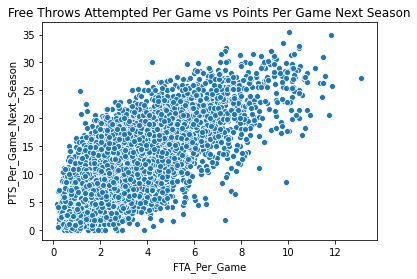

In [78]:
# Strong positive correlation seen between Free Throws Attempted Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['FTA_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Free Throws Attempted Per Game vs Points Per Game Next Season')

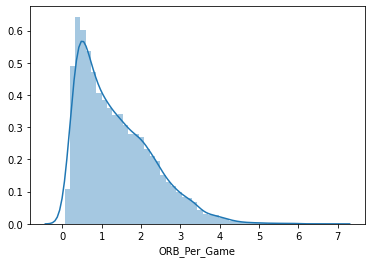

In [79]:
# Offensive Rebounds Per Game has a right skewed distribution, between 0 & 1 Offensive Rebounds Per Game is the most common

sns.distplot(nba_season_stats['ORB_Per_Game'])

Text(0.5, 1.0, 'Offensive Rebounds Per Game vs Points Per Game Next Season')

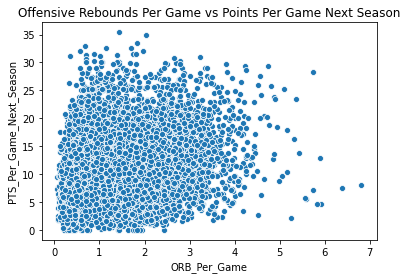

In [80]:
# No significant correlation seen between Offensive Rebounds Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['ORB_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Offensive Rebounds Per Game vs Points Per Game Next Season')

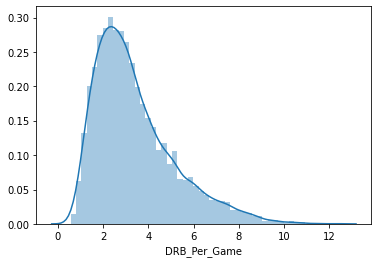

In [81]:
# Defensive Rebounds Per Game has right skewed distribution, around 2-3 Defensive Rebounds Per Game the most common 

sns.distplot(nba_season_stats['DRB_Per_Game'])

Text(0.5, 1.0, 'Defensive Rebounds Per Game vs Points Per Game Next Season')

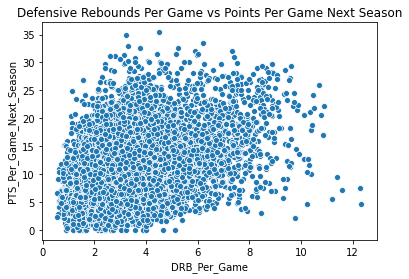

In [82]:
# No significant correlation seen between Defensive Rebounds Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['DRB_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Defensive Rebounds Per Game vs Points Per Game Next Season')

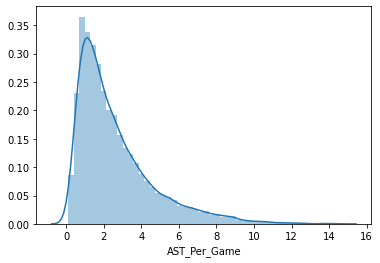

In [83]:
# Assists Per Game has a right skewed distribution with about 1 Assist Per Game being the most common 

sns.distplot(nba_season_stats['AST_Per_Game'])

Text(0.5, 1.0, 'Assists Per Game vs Points Per Game Next Season')

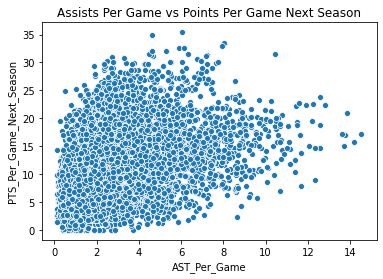

In [84]:
# No significant correlation seen between Assists Per Game & Points Per Game Next Season 

sns.scatterplot(x=nba_season_stats['AST_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Assists Per Game vs Points Per Game Next Season')

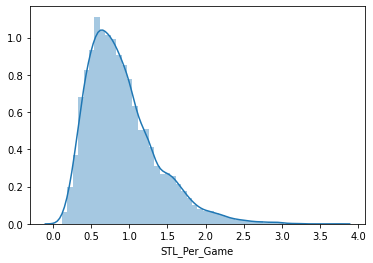

In [85]:
# Steals Per Game has a right skewed distribution with between 0.5-1 Steals Per Game being the most common 

sns.distplot(nba_season_stats['STL_Per_Game'])

Text(0.5, 1.0, 'Steals Per Game vs Points Per Game Next Season')

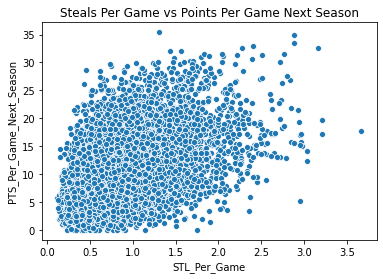

In [86]:
# Slight positive correlation seen between Steals Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['STL_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Steals Per Game vs Points Per Game Next Season')

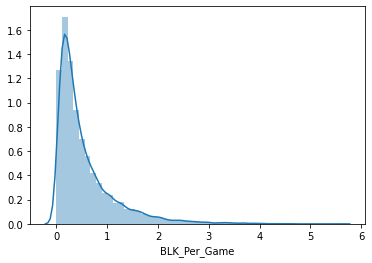

In [87]:
# Blocks Per Game has a heavily right skewed distribution with between 0-1 Blocks Per Game being the most common 

sns.distplot(nba_season_stats['BLK_Per_Game'])

Text(0.5, 1.0, 'Blocks Per Game vs Points Per Game Next Season')

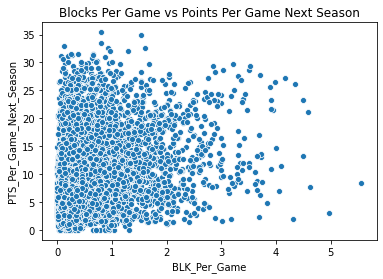

In [88]:
# No correlation seen between Blocks Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['BLK_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Blocks Per Game vs Points Per Game Next Season')

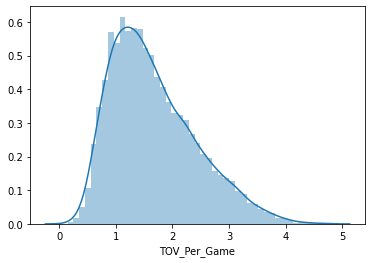

In [89]:
# Turnovers Per Game has a slightly right skewed distribution with around 1-1.5 Turnovers Per Game being the most common 

sns.distplot(nba_season_stats['TOV_Per_Game'])

Text(0.5, 1.0, 'Turnovers Per Game vs Points Per Game Next Season')

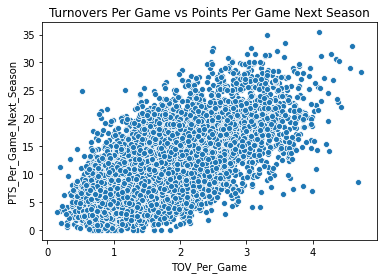

In [90]:
# Positive correlation seen between Turnovers Per Game & Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['TOV_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Turnovers Per Game vs Points Per Game Next Season')

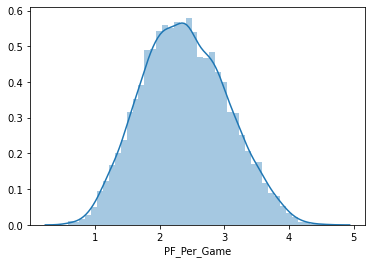

In [91]:
# Personal Fouls Per Game has a normal distribution with between 2-3 Personal Fouls Per Game being the most common

sns.distplot(nba_season_stats['PF_Per_Game'])

Text(0.5, 1.0, 'Personal Fouls Per Game vs Points Per Game Next Season')

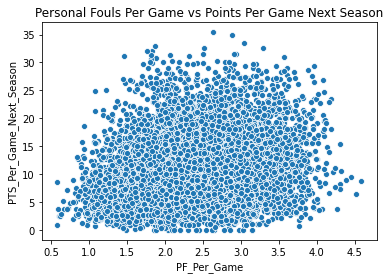

In [92]:
# No siginificant correlations seen between Personal Fouls Per Game & Points Per Game 

sns.scatterplot(x=nba_season_stats['PF_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Personal Fouls Per Game vs Points Per Game Next Season')

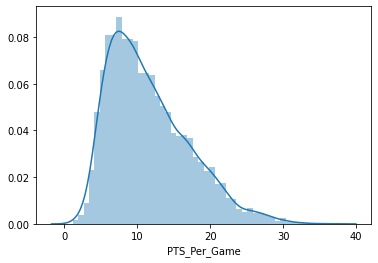

In [93]:
# Points Per Game has a right skewed distribution, around 8 Points Per Game seems to be the most common

sns.distplot(nba_season_stats['PTS_Per_Game'])

Text(0.5, 1.0, 'Points Per Game vs Points Per Game Next Season')

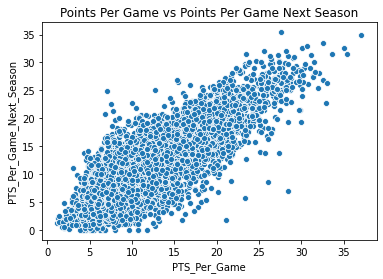

In [94]:
# Points Per Game has a strong postive correlation with Points Per Game Next Season

sns.scatterplot(x=nba_season_stats['PTS_Per_Game'], y=nba_season_stats['PTS_Per_Game_Next_Season'])
plt.title('Points Per Game vs Points Per Game Next Season')

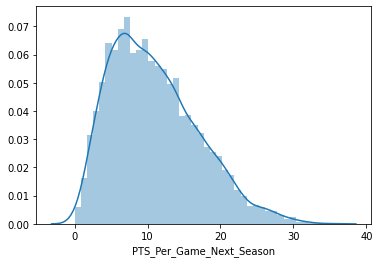

In [95]:
# Points Per Game Next Season has a right skewed distribution, around 8 Points Per Game Next Season seems to be the most common

sns.distplot(nba_season_stats['PTS_Per_Game_Next_Season'])

In [96]:
# Importing packages for ML models 

import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

In [97]:
# Setting up X_train, X_test, Y_train, & Y_test variables for models 
# Removing variables that are highly correlated with other predictor variables (correlation coefficient over 0.9), predictor variable that is more strongly correlated with PTS_Per_Game_Next_Season kept
# Year removed due to its negligible affect (shown above as PTS_Per_Game_Next_Season does not vary much through the years)

X_train = nba_season_stats.drop(['Year', 'PTS_Per_Game_Next_Season'], axis=1)

In [98]:
# Aligning X_test columns with X_train columns 

X_test = nba_season_stats_2017_2020.drop(['Year', 'PTS_Per_Game_Next_Season'], axis=1)
column_names = ['Age', 'G', 'GS', 'USG%', 'OBPM', 'DBPM', 'Minutes_Per_Game', 'FG_Per_Game', 'FGA_Per_Game', '3P_Per_Game', '3PA_Per_Game', '2P_Per_Game', '2PA_Per_Game', 'FT_Per_Game', 'FTA_Per_Game', 'ORB_Per_Game', 'DRB_Per_Game', 'AST_Per_Game', 'STL_Per_Game', 'BLK_Per_Game', 'TOV_Per_Game', 'PF_Per_Game', 'PTS_Per_Game']
X_test = X_test.reindex(columns = column_names)

In [99]:
Y_train = nba_season_stats['PTS_Per_Game_Next_Season'] 

In [100]:
Y_test = nba_season_stats_2017_2020['PTS_Per_Game_Next_Season']

In [101]:
# Seeing number of rows in training & testing data 

X_train.count()

Age                 8163
G                   8163
GS                  8163
USG%                8163
OBPM                8163
DBPM                8163
Minutes_Per_Game    8163
FG_Per_Game         8163
FGA_Per_Game        8163
3P_Per_Game         8163
3PA_Per_Game        8163
2P_Per_Game         8163
2PA_Per_Game        8163
FT_Per_Game         8163
FTA_Per_Game        8163
ORB_Per_Game        8163
DRB_Per_Game        8163
AST_Per_Game        8163
STL_Per_Game        8163
BLK_Per_Game        8163
TOV_Per_Game        8163
PF_Per_Game         8163
PTS_Per_Game        8163
dtype: int64

In [102]:
X_test.count()

Age                 918
G                   918
GS                  918
USG%                918
OBPM                918
DBPM                918
Minutes_Per_Game    918
FG_Per_Game         918
FGA_Per_Game        918
3P_Per_Game         918
3PA_Per_Game        918
2P_Per_Game         918
2PA_Per_Game        918
FT_Per_Game         918
FTA_Per_Game        918
ORB_Per_Game        918
DRB_Per_Game        918
AST_Per_Game        918
STL_Per_Game        918
BLK_Per_Game        918
TOV_Per_Game        918
PF_Per_Game         918
PTS_Per_Game        918
dtype: int64

In [103]:
# Standard linear regression
# Has R^2 score of 73.51% on training data

nba_stats_reg = LinearRegression(normalize=True)
nba_stats_reg.fit(X_train, Y_train)
nba_stats_reg.score(X_train, Y_train)

0.735105608197532

In [104]:
# Linear regression RMSE on training data 

Y_pred = nba_stats_reg.predict(X_train)
nba_stats_reg_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
nba_stats_reg_rmse

3.107645105468146

In [105]:
# Linear regression R^2 score on testing data is 74.94%, higher than training data R^2 score

nba_stats_reg.score(X_test, Y_test)

0.7493836377427854

In [106]:
# Linear regression RMSE on testing data

Y_pred = nba_stats_reg.predict(X_test)
nba_stats_reg_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
nba_stats_reg_rmse

3.0510455799382252

In [107]:
# Coefficients of predictor variables in linear regression model
# FT_Per_Game, 2P_Per_Game, & FG_Per_Game have highest magnitude variable coefficient values

reg_coeff = pd.DataFrame()
reg_coeff['Columns'] = X_train.columns
reg_coeff['Coefficient Estimates'] = pd.Series(nba_stats_reg.coef_)
reg_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
15,ORB_Per_Game,-0.299899
14,FTA_Per_Game,-0.234586
0,Age,-0.231947
21,PF_Per_Game,-0.227050
18,STL_Per_Game,-0.130168
19,BLK_Per_Game,-0.054557
17,AST_Per_Game,-0.034846
12,2PA_Per_Game,-0.013832
2,GS,-0.008657
1,G,0.008517


In [108]:
# Lasso regression 

lasso = Lasso(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
lasso_regressor = GridSearchCV(lasso, parameters, cv=5)
lasso_regressor.fit(X_train, Y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 29892.27463634752, tolerance: 23.090229115697984
  positive)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31515.943996409474, tolerance: 24.077680115011656
  positive)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 31754.44285596687, tolerance: 23.511922258926017
  positive)
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality g

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=1000, normalize=True, positive=False,
                             precompute=False, random_state=None,
                             selection='cyclic', tol=0.0001, warm_start=False),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [109]:
# lasso regression has similar R^2 score on training data to previous Linear regression 

lasso_regressor.score(X_train, Y_train)

0.7348247858974334

In [110]:
# Lasso regression RMSE on training set 

Y_pred = lasso_regressor.predict(X_train)
nba_stats_lasso_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
nba_stats_lasso_rmse

3.109291921903807

In [111]:
# lasso regression has similar R^2 score on testing data to previous Linear regression 

lasso_regressor.score(X_test, Y_test)

0.7496416314356085

In [112]:
# Lasso regression RMSE on testing set 

Y_pred = lasso_regressor.predict(X_test)
nba_stats_lasso_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
nba_stats_lasso_rmse

3.0494747463465877

In [113]:
lasso_regressor.best_params_

{'alpha': 0.0001}

In [114]:
# Coefficients of predictor varaibles in lasso regression model 
# FG_Per_Game has significantly higher coefficient value than other variables 

lasso = Lasso(normalize=True, alpha=.0001)
lasso.fit(X_train,Y_train)

lasso_coeff = pd.DataFrame()
lasso_coeff['Columns'] = X_train.columns
lasso_coeff['Coefficient Estimates'] = pd.Series(lasso.coef_)
lasso_coeff.sort_values(by=['Coefficient Estimates'])

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 139.4496370331035, tolerance: 29.760475465882454
  positive)


,Columns,Coefficient Estimates
15,ORB_Per_Game,-0.267133
0,Age,-0.226370
21,PF_Per_Game,-0.203797
2,GS,-0.006823
18,STL_Per_Game,-0.005720
19,BLK_Per_Game,-0.000000
17,AST_Per_Game,-0.000000
14,FTA_Per_Game,-0.000000
12,2PA_Per_Game,0.000000
11,2P_Per_Game,0.000000


In [115]:
# Ridge regression 

ridge = Ridge(normalize=True)
parameters = {'alpha': [1e-15, 1e-10, 1e-8, 1e-4, 1e-3, 1e-2, 1, 5, 10, 20]}
ridge_regressor = GridSearchCV(ridge, parameters, cv=5)
ridge_regressor.fit(X_train,Y_train)

C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.89419e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.28869e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.22977e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=5.98182e-17): result may not be accurate.
  overwrite_a=True).T
C:\Users\Owner\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=4.77974e-17): result may not be accurate.
  overwrite_a=True).T


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=True, random_state=None,
                             solver='auto', tol=0.001),
             iid='warn', n_jobs=None,
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 10, 20]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [116]:
# Ridge regression has similar R^2 score on training data to previous Linear regression & Lasso regression 

ridge_regressor.score(X_train,Y_train)

0.7349099877568765

In [117]:
# Ridge regression RMSE on training set 

Y_pred = ridge_regressor.predict(X_train)
nba_stats_ridge_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
nba_stats_ridge_rmse

3.10879236779319

In [118]:
# Ridge regression has similar R^2 score on testing data to previous Linear regression & Lasso regression 

ridge_regressor.score(X_test,Y_test)

0.7466909235931545

In [119]:
# Ridge regression RMSE on testing set 

Y_pred = ridge_regressor.predict(X_test)
nba_stats_ridge_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
nba_stats_ridge_rmse

3.06739256433853

In [120]:
ridge_regressor.best_params_

{'alpha': 0.01}

In [121]:
# Coefficients of predictor varaibles in ridge regression model
# Simlar coefficient values for variables with highest magnitude coefficients as standard linear regression model 

ridge = Ridge(normalize=True, alpha=.01)
ridge.fit(X_train, Y_train)

ridge_coeff = pd.DataFrame()
ridge_coeff['Columns'] = X_train.columns
ridge_coeff['Coefficient Estimates'] = pd.Series(ridge.coef_)
ridge_coeff.sort_values(by=['Coefficient Estimates'])

,Columns,Coefficient Estimates
15,ORB_Per_Game,-0.353955
0,Age,-0.228105
21,PF_Per_Game,-0.225574
18,STL_Per_Game,-0.134919
17,AST_Per_Game,-0.057649
19,BLK_Per_Game,-0.032482
2,GS,-0.007941
14,FTA_Per_Game,-0.002689
1,G,0.008876
6,Minutes_Per_Game,0.014511


In [2933]:
# Random forest regression model 
# R^2 score of 73.62% on training data 

grid_values = {'max_depth': [2,3,4,5], 'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]}

rf = RandomForestRegressor()
rf_model = GridSearchCV(rf, grid_values, cv=5)
rf_model.fit(X_train, Y_train)
rf_model.score(X_train, Y_train)

0.7362402803419859

In [2934]:
# Random forest model RMSE on training set 

Y_pred = rf_model.predict(X_train)
nba_stats_rf_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
nba_stats_rf_rmse

3.1009821812628284

In [2935]:
# Random forest model has R^2 score of 73.88% on testing data, slightly lower than models above 

rf_model.score(X_test, Y_test)

0.7387808274964003

In [2936]:
# Random forest model RMSE on testing set 

Y_pred = rf_model.predict(X_test)
nba_stats_rf_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
nba_stats_rf_rmse

3.1149172186157585

In [2937]:
rf_model.best_params_

{'max_depth': 5, 'max_features': 16}

In [2938]:
# Feature importances of predictor variables in random forest model
# PTS_Per_Game the most important feature by far in random forest model 

pd.Series(rf_model.best_estimator_.feature_importances_, index=X_train.columns).sort_values()

2P_Per_Game         0.000000
2PA_Per_Game        0.000078
ORB_Per_Game        0.000088
3P_Per_Game         0.000094
PF_Per_Game         0.000101
BLK_Per_Game        0.000305
3PA_Per_Game        0.000306
TOV_Per_Game        0.000308
DRB_Per_Game        0.000329
DBPM                0.000350
G                   0.000417
GS                  0.000602
Minutes_Per_Game    0.000893
AST_Per_Game        0.001036
STL_Per_Game        0.001247
OBPM                0.001437
USG%                0.001879
FTA_Per_Game        0.001999
Age                 0.019982
FT_Per_Game         0.027063
FGA_Per_Game        0.082652
FG_Per_Game         0.207915
PTS_Per_Game        0.650921
dtype: float64

In [2939]:
# Building a gradient boosting regression model
# Has highest R^2 score of 74.87% on training data, highest out all models used 


grid_values = {'max_depth': [2,3,4,5], 'max_features': [2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]}

gb = GradientBoostingRegressor()
gb_model = GridSearchCV(gb, grid_values, cv=5) 
gb_model.fit(X_train, Y_train)
gb_model.score(X_train, Y_train)   

0.7487163290271299

In [2940]:
# Gradient boosting model RMSE on training data 
# Lowest RMSE seen on training data

Y_pred = gb_model.predict(X_train)
nba_stats_gb_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
nba_stats_gb_rmse

3.02675430262094

In [2941]:
# Gradient boosting model has R^2 score of 75.32% on testing data 
# Highest R^2 score on testing data out of all models 

gb_model.score(X_test, Y_test)

0.753177691075136

In [2942]:
# Gradient boosting model RMSE on testing data 
# Lowest RMSE seen on testing data 

Y_pred = gb_model.predict(X_test)
nba_stats_gb_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
nba_stats_gb_rmse

3.0278627844411

In [2943]:
gb_model.best_params_

{'max_depth': 2, 'max_features': 19}

In [2944]:
# Feature importances of predictor variables in gradient boosting model
# PTS_Per_Game is the most important feature in gradient boosting model, even more important than in random forest model

pd.Series(gb_model.best_estimator_.feature_importances_, index=X_train.columns).sort_values()

AST_Per_Game        0.000058
Minutes_Per_Game    0.000136
ORB_Per_Game        0.000215
BLK_Per_Game        0.000222
STL_Per_Game        0.000446
DRB_Per_Game        0.000453
PF_Per_Game         0.000611
3P_Per_Game         0.000612
2PA_Per_Game        0.000718
FGA_Per_Game        0.000764
3PA_Per_Game        0.000866
G                   0.000926
FTA_Per_Game        0.001024
GS                  0.001374
TOV_Per_Game        0.001380
2P_Per_Game         0.001547
DBPM                0.002932
USG%                0.005058
OBPM                0.012492
FT_Per_Game         0.017158
FG_Per_Game         0.019888
Age                 0.031735
PTS_Per_Game        0.899383
dtype: float64

In [2945]:
# Support vector regression model
# R^2 score of 73.39% on training data 

nba_stats_svr_regressor = SVR(kernel = 'linear')
nba_stats_svr_regressor.fit(X_train, Y_train)
nba_stats_svr_regressor.score(X_train, Y_train)

0.7338502383411021

In [2946]:
# SVR model RMSE on training data

Y_pred = nba_stats_svr_regressor.predict(X_train)
nba_stats_svr_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
nba_stats_svr_rmse

3.1150001739438693

In [2947]:
# SVR model has R^2 score of 75.28% on testing data 

nba_stats_svr_regressor.score(X_test, Y_test)

0.752834672208377

In [2948]:
# SVR model RMSE on testing data

Y_pred = nba_stats_svr_regressor.predict(X_test)
nba_stats_svr_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
nba_stats_svr_rmse

3.029966025159415

In [2949]:
# KNN model
# R^2 score of 72.33% on training data

params = {'n_neighbors':[5,10,15,20,25,30,35,40,45,50]}

knn = KNeighborsRegressor()
knn_model = GridSearchCV(knn, params)
knn_model.fit(X_train, Y_train)
knn_model.score(X_train, Y_train)

0.7232709023970137

In [2950]:
# KNN model RMSE on training data 

Y_pred = knn_model.predict(X_train)
nba_stats_knn_rmse = np.sqrt(mean_squared_error(Y_train, Y_pred))
nba_stats_knn_rmse

3.176306825851886

In [2951]:
# KNN model has R^2 score of 70.38% on testing data 

knn_model.score(X_test, Y_test)

0.7037678221340169

In [2952]:
# KNN model RMSE on testing set

Y_pred = knn_model.predict(X_test)
nba_stats_knn_rmse = np.sqrt(mean_squared_error(Y_test, Y_pred))
nba_stats_knn_rmse

3.31711173317527

In [2953]:
knn_model.best_params_

{'n_neighbors': 30}

In [2960]:
# Setting up data from latest NBA season to see how gradient boosting model perfroms on it 

nba_season_stats_2019_2020.head(5)

,Player,Year,Pos,Age,Tm,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,FG%,3P_Per_Game,3PA_Per_Game,3P%,2P_Per_Game,2PA_Per_Game,2P%,eFG%,FT_Per_Game,FTA_Per_Game,FT%,ORB_Per_Game,DRB_Per_Game,TRB_Per_Game,AST_Per_Game,STL_Per_Game,BLK_Per_Game,TOV_Per_Game,PF_Per_Game,PTS_Per_Game,PER,TS%,3PAr,FTr,ORB%,DRB%,TRB%,AST%,STL%,BLK%,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,WS_Per_Game,PTS_Per_Game_Next_Season
1502,Shai Gilgeous-Alexander,2019,PG,20,LAC,82,73,26.5,4.2,8.7,0.476,0.6,1.7,0.367,3.5,7.0,0.503,0.512,1.9,2.4,0.800,0.7,2.1,2.8,3.3,1.2,0.5,1.7,2.1,10.8,13.4,0.554,0.194,0.272,2.9,8.3,5.7,17.8,2.1,1.6,15.0,18.3,1.5,1.9,3.3,0.074,-0.9,0.4,-0.5,0.8,0.040244,19.0
1964,Ivica Zubac,2019,C,21,TOT,59,37,17.6,3.6,6.4,0.559,0.0,0.0,0.000,3.6,6.4,0.559,0.559,1.7,2.1,0.802,1.9,4.2,6.1,1.1,0.2,0.9,1.2,2.3,8.9,18.9,0.604,0.000,0.332,11.9,24.2,18.2,9.1,0.6,4.0,13.9,20.3,1.9,1.3,3.2,0.148,-0.2,-0.2,-0.5,0.4,0.054237,8.5
1590,Reggie Jackson,2019,PG,28,DET,82,82,27.9,5.4,12.8,0.421,2.1,5.7,0.369,3.3,7.0,0.464,0.504,2.5,2.9,0.864,0.5,2.1,2.6,4.2,0.7,0.1,1.8,2.5,15.4,15.2,0.547,0.450,0.225,2.1,8.5,5.2,24.7,1.2,0.3,11.4,24.5,3.1,1.9,5.0,0.105,1.3,-0.9,0.4,1.4,0.060976,11.9
1539,Shaquille Harrison,2019,SG,25,CHI,73,11,19.6,2.5,5.8,0.432,0.3,1.2,0.270,2.2,4.6,0.475,0.460,1.1,1.7,0.667,0.5,2.6,3.0,1.9,1.2,0.4,0.8,1.7,6.5,12.4,0.494,0.209,0.289,2.5,14.5,8.4,14.1,3.0,1.8,11.1,16.5,-0.1,1.6,1.4,0.048,-2.8,1.5,-1.3,0.2,0.019178,4.9
1937,Hassan Whiteside,2019,C,29,MIA,72,53,23.3,5.4,9.4,0.571,0.0,0.2,0.125,5.4,9.2,0.581,0.572,1.5,3.4,0.449,3.6,7.8,11.3,0.8,0.6,1.9,1.3,2.7,12.3,23.5,0.564,0.024,0.357,16.3,35.6,25.9,5.6,1.3,7.3,11.0,22.6,2.3,4.0,6.3,0.180,1.1,1.2,2.3,1.8,0.087500,15.5


In [123]:
nba_season_stats_2019_2020.set_index('Player').head(5)

,Year,Pos,Age,Tm,G,GS,Minutes_Per_Game,FG_Per_Game,FGA_Per_Game,FG%,...,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP,WS_Per_Game,PTS_Per_Game_Next_Season
Player,,,,,,,,,,,,,,,,,,,,,
Shai Gilgeous-Alexander,2019,PG,20,LAC,82,73,26.5,4.2,8.7,0.476,...,1.5,1.9,3.3,0.074,-0.9,0.4,-0.5,0.8,0.040244,19.0
Ivica Zubac,2019,C,21,TOT,59,37,17.6,3.6,6.4,0.559,...,1.9,1.3,3.2,0.148,-0.2,-0.2,-0.5,0.4,0.054237,8.5
Reggie Jackson,2019,PG,28,DET,82,82,27.9,5.4,12.8,0.421,...,3.1,1.9,5.0,0.105,1.3,-0.9,0.4,1.4,0.060976,11.9
Shaquille Harrison,2019,SG,25,CHI,73,11,19.6,2.5,5.8,0.432,...,-0.1,1.6,1.4,0.048,-2.8,1.5,-1.3,0.2,0.019178,4.9
Hassan Whiteside,2019,C,29,MIA,72,53,23.3,5.4,9.4,0.571,...,2.3,4.0,6.3,0.180,1.1,1.2,2.3,1.8,0.087500,15.5


In [2963]:
X_2019_2020 = nba_season_stats_2019_2020.drop(['Player', 'Pos', 'Tm', 'OWS', 'DWS', 'WS', 'WS/48', 'BPM', 'TRB_Per_Game', 'FG%', '3P%', '2P%', 'FT%','ORB%', 'DRB%', 'TRB%', 'AST%', 'STL%', 'BLK%', 'TOV%', 'TS%', '3PAr', 'FTr', 'eFG%', 'WS_Per_Game', 'PER', 'VORP', 'PTS_Per_Game_Next_Season'], axis=1)

In [2964]:
column_names = ['Age', 'G', 'GS', 'USG%', 'OBPM', 'DBPM', 'Minutes_Per_Game', 'FG_Per_Game', 'FGA_Per_Game', '3P_Per_Game', '3PA_Per_Game', '2P_Per_Game', '2PA_Per_Game', 'FT_Per_Game', 'FTA_Per_Game', 'ORB_Per_Game', 'DRB_Per_Game', 'AST_Per_Game', 'STL_Per_Game', 'BLK_Per_Game', 'TOV_Per_Game', 'PF_Per_Game', 'PTS_Per_Game']
X_2019_2020 = X_2019_2020.reindex(columns = column_names)

In [2965]:
Y_2019_2020 = nba_season_stats_2019_2020['PTS_Per_Game_Next_Season'] 

In [2966]:
# Gradient boosting model has R^2 score of 77.45% when predicting points per game scored in 2020 using 2019 player statistics 

gb_model.score(X_2019_2020, Y_2019_2020)

0.7744634285539925

In [2968]:
# Gradient boosting model RMSE on 2020 points per game 

Y_pred = gb_model.predict(X_2019_2020)
nba_stats_gb_rmse = np.sqrt(mean_squared_error(Y_2019_2020, Y_pred))
nba_stats_gb_rmse

3.010272446084877